# Description
Use the Simple Moving Average Crossover (and Python) to get buy and sell signals

In [44]:
# Importing libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
# Define the ticker symbol (stock type)
ticker_symbol = "XOM"

# Create the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
start = "2020-03-01"
end="2020-12-01"
historical_data = ticker.history(start=start,end=end)
print("Historical Data:")
print(historical_data)

# Defining the df to prevent overwriting original data
df = historical_data

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  353.238603  362.591696  351.731206  358.986664   
2022-01-04 00:00:00-05:00  365.252355  372.562295  364.298867  370.019714   
2022-01-05 00:00:00-05:00  372.126478  374.723568  361.311406  361.983368   
2022-01-06 00:00:00-05:00  364.135389  364.317014  350.904828  360.439545   
2022-01-07 00:00:00-05:00  361.111572  363.726786  358.260224  360.966278   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  321.399853  324.121381  319.787437  322.024323   
2022-12-27 00:00:00-05:00  322.956289  324.111992  318.557126  318.724884   
2022-12-28 00:00:00-05:00  317.354801  319.545067  316.236359  317.699646   
2022-12-29 00:00:00-05:00  319.162936  321.213404  318.044493  320.085632   
2022-12-30 00:00:00-05:00  318.510557  320.328019  316.3296

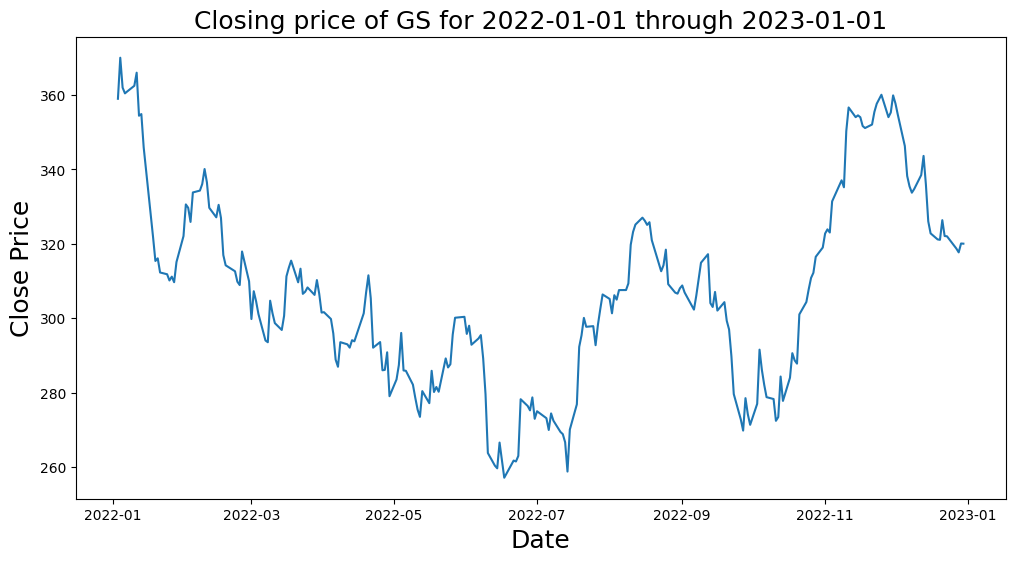

In [72]:
# Visually show the close price
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end}", fontsize=18)
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [73]:
# Create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=20, column="Close"):
    return data[column].rolling(window=period).mean()

In [74]:
#Create two new columns to store the 20 and 50 day SMA
df["SMA20"] = SMA(df,period=20)
df["SMA50"] = SMA(df,period=50)

In [75]:
# Get the buy and sell signals
df["Signal"] = np.where(df["SMA20"] > df["SMA50"], 1, 0)
df["Position"] = df["Signal"].diff()
df["Buy"] = np.where(df["Position"] == 1, df["Close"], np.nan)
df["Sell"] = np.where(df["Position"] == -1, df["Close"], np.nan)

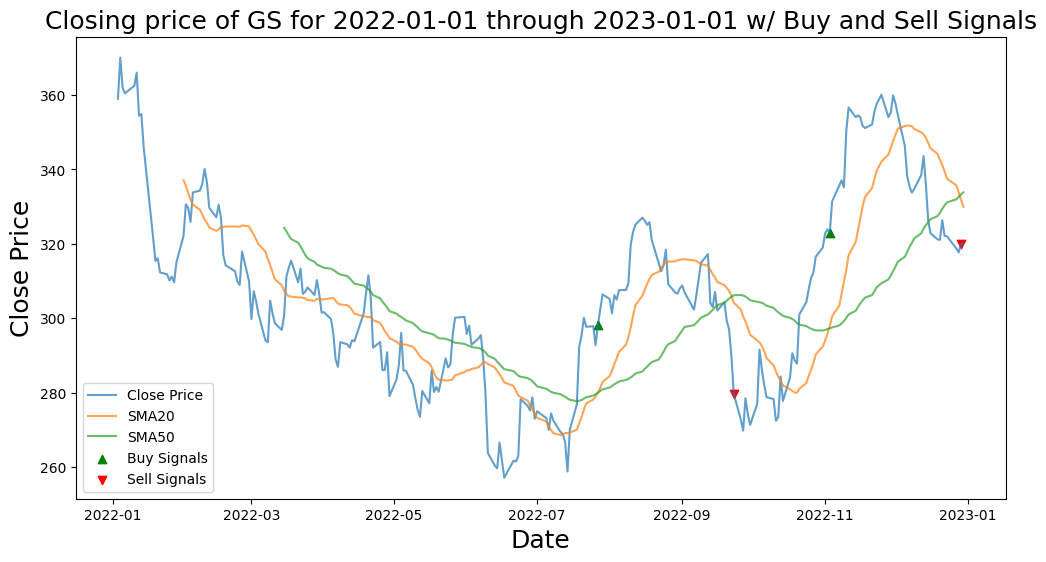

In [76]:
# Show the close price with SMAs and Buy/Sell signals
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Buy and Sell Signals", fontsize=18)
plt.plot(df["Close"],alpha=0.7,label="Close Price")
plt.plot(df["SMA20"],alpha=0.7,label="SMA20")
plt.plot(df["SMA50"],alpha=0.7,label="SMA50")
plt.scatter(df.index, df["Buy"],alpha=1,label="Buy Signals",marker="^",color="green")
plt.scatter(df.index, df["Sell"],alpha=1,label="Sell Signals",marker="v",color="red")

plt.legend()
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.savefig(f"imgs/{ticker_symbol}_{start}_{end}")
plt.show()